# EDA 

Goal: Find which question to focus on and create a final dataframe to move on to statistical analysis and model training

Ideas that I want to look at: 
 - grocery store counts per capita
 - fast food counts per capita
 - access to a grocery store
 - convienence stores per capita

Notebook breakdown: 
1. Imports
2. Descriptive Stats
3. Interest points (stated above)

## Import 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
access = pd.read_pickle("../Datasets/access")
assistance = pd.read_pickle("../Datasets/assistance")
health = pd.read_pickle("../Datasets/health")
local = pd.read_pickle("../Datasets/local")
population = pd.read_pickle("../Datasets/population")
restaurants = pd.read_pickle("../Datasets/restaurants")
socioecnomic = pd.read_pickle("../Datasets/socioeconomic")
stores = pd.read_pickle("../Datasets/stores")
insecurity_state = pd.read_pickle("../Datasets/insecurity_state")

In [21]:
df_list = [access,
          assistance, 
          health, 
          local, 
          population,
          restaurants, 
          socioecnomic, 
          stores]

## Descriptive Stats 

In [22]:
 df_describe = [df.describe().round(2) for df in df_list]

### Access

In [23]:
df_describe[0]

,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,LACCESS_HHNV10,LACCESS_HHNV15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,LACCESS_SNAP15,PCT_LACCESS_SNAP15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,LACCESS_SENIORS10,LACCESS_SENIORS15,PCH_LACCESS_SENIORS_10_15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,LACCESS_WHITE15,PCT_LACCESS_WHITE15,LACCESS_BLACK15,PCT_LACCESS_BLACK15,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,20172.10,19184.39,7166.25,23.54,22.92,5554.32,5798.69,7272.04,8.36,8.57,660.90,673.26,37.09,3.13,3.27,799.57,2.88,4962.45,4716.81,275.15,5.50,5.36,2684.48,2556.97,2072.41,3.92,3.77,14694.43,18.88,2257.85,1.87,2314.16,2.01,691.52,0.25,224.38,0.76,32.04,0.02,1284.16,1.15
std,15156.37,51330.88,47702.90,394117.43,20.24,19.59,13869.17,13958.59,398871.72,8.18,8.30,1121.57,1100.68,800.49,2.98,3.04,1866.80,3.06,13175.14,12190.60,11016.24,4.86,4.79,6529.29,6171.27,110378.39,4.22,3.97,35041.06,17.54,8772.81,4.13,12130.04,5.02,3457.95,0.69,1370.58,4.51,434.74,0.13,5401.40,1.86
min,1001.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18178.50,1663.53,1593.70,-10.84,10.85,10.77,593.10,593.98,-12.22,3.44,3.57,118.11,125.51,-14.60,1.61,1.68,66.25,1.12,365.18,350.13,-10.80,2.40,2.36,276.58,270.67,-10.81,1.58,1.60,1281.91,8.37,6.87,0.05,30.64,0.19,3.12,0.03,5.14,0.03,0.00,0.00,32.71,0.22
50%,29176.00,4097.36,4092.45,-0.04,19.68,19.12,1500.41,1605.99,3.40,6.15,6.49,320.01,339.53,4.89,2.57,2.67,215.70,2.11,937.56,944.27,-0.02,4.44,4.36,676.76,655.40,-0.00,2.82,2.76,3326.72,15.12,84.01,0.25,133.46,0.57,16.20,0.08,20.62,0.07,1.00,0.00,129.87,0.57
75%,45079.50,12962.16,12992.90,7.26,29.58,28.77,4590.74,4844.07,23.54,10.32,10.66,706.48,754.50,29.39,3.80,4.03,677.96,3.64,3009.33,2982.93,7.01,6.96,6.84,1865.31,1831.02,7.41,4.53,4.40,10649.43,23.59,995.41,1.67,869.84,1.67,128.98,0.25,100.44,0.19,7.01,0.01,652.02,1.31
max,56045.00,886068.67,740267.41,22083757.71,100.00,100.00,292541.79,259479.52,22348934.36,72.27,71.84,16334.42,13845.22,43191.28,60.87,53.52,29461.30,37.25,260308.79,219002.49,592130.56,34.02,39.14,78922.92,86014.56,6181695.63,29.21,29.15,413148.29,99.16,167913.19,50.14,263440.50,79.32,76998.35,25.09,40350.80,83.84,21387.06,4.47,115781.02,27.12


The max of some of these values seemed extreme, such as `PCH_LACCESS_POP_10_15` and I could not find a reason. However after looking at the original, uncleaned data, it seems that the `LACCESS_POP10` was smaller than two decimal places. This means that the data was lost in rounding. I then went back to the cleaning notebook and made rounding optional. The problem should not reoccur and the extreme outliers should now be visible.

In [24]:
access.loc[access["PCH_LACCESS_POP_10_15"]==access["PCH_LACCESS_POP_10_15"].max()]

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,LACCESS_HHNV10,LACCESS_HHNV15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,LACCESS_SNAP15,PCT_LACCESS_SNAP15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,LACCESS_SENIORS10,LACCESS_SENIORS15,PCH_LACCESS_SENIORS_10_15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,LACCESS_WHITE15,PCT_LACCESS_WHITE15,LACCESS_BLACK15,PCT_LACCESS_BLACK15,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
671,17155,IL,Putnam,0.00297,655.860707,2.208376e+07,0.000049,10.920092,0.000589,131.659125,2.234893e+07,0.00001,2.192127,41.265955,42.104037,2.030928,1.644717,1.67812,25.335954,1.009803,0.0,95.080732,0.0,0.0,1.583096,0.00297,183.59097,6.181696e+06,0.000049,3.056793,644.860704,10.736941,0.0,0.0,13.967849,0.232565,2.0,0.0333,0.0,0.0,0.0,0.0,9.0,0.14985


Access Take aways:
- in some counties, 100% of the population is low access (urban - 1 mile, rural - 10 miles from grocery store)
- however these areas are outliers, around 75% of the counties have 30% of their population that is low access
- this decreases when you add the qualifiaction of low income 75% of counties are around 10% of population that is low access and low income
- these percentages drastically decrease when adding variables such as no vehical, recieve snap, are children/seniors,etc
- the majority of low access people are white (however this could be skewed by looking at aggregate values) there seem to be counties where at 70% of their low access population are native american or hispanic. 

### Assistance

In [25]:
df_describe[1]

,FIPS,REDEMP_SNAPS12,REDEMP_SNAPS16,PCH_REDEMP_SNAPS_12_16,PC_SNAPBEN10,PC_SNAPBEN15,PCH_PC_SNAPBEN_10_15,PCT_FREE_LUNCH09,PCT_FREE_LUNCH14,PCT_REDUCED_LUNCH09,PCT_REDUCED_LUNCH14,FDPIR12
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,235273.25,185808.32,-18.17,18.14,17.17,-4.77,40.30,42.47,9.13,7.11,0.15
std,15156.37,138227.03,109964.61,20.76,9.89,9.92,16.84,17.22,21.18,3.37,4.13,0.96
min,1001.00,0.00,0.00,-93.35,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,0.00
25%,18178.50,135189.25,103605.86,-31.33,10.89,10.17,-15.27,28.81,30.02,7.39,4.74,0.00
50%,29176.00,245318.02,187164.66,-19.88,17.14,15.85,-6.11,39.59,42.40,9.16,7.42,0.00
75%,45079.50,327456.93,254290.29,-6.33,23.92,22.45,3.58,50.45,54.58,11.01,9.67,0.00
max,56045.00,1253320.97,827697.74,405.98,76.28,100.14,166.49,99.48,100.00,45.60,32.05,22.00


Assistance Take-aways:
- overall snap redemptions seem to be declining with at least 75% of counties reducing redemptions by 6%; however, there are outliers, such as the county whose redemptions have increased by 405%. Would be interesting to see if they have had an increase in snap approved stores in that county. 
- the number of people recieving snap benefits has also been declining or stayed relatively stable (except for outliers). 
- there seems to be an increase in the percent of students who are eligible for free lunch - while there is a reduction in the percent of students who are eligible for reduced lunch. could indicate that people are becoming poorer (depening on other factors).

### Health

In [26]:
df_describe[2]

,FIPS,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.0,3140.00,3140.00,3140.00,3140.00
mean,30387.63,9.90,11.24,28.88,31.01,9.66,10.1,-0.91,0.08,0.07,-6.34
std,15156.37,2.09,2.48,3.88,4.52,29.93,33.6,55.48,0.08,0.07,48.55
min,1001.00,0.00,3.30,0.00,11.80,0.00,0.0,-100.00,0.00,0.00,-100.00
25%,18178.50,8.50,9.50,27.20,28.30,0.00,0.0,-25.00,0.00,0.00,-24.69
50%,29176.00,9.80,11.10,29.10,31.20,2.00,2.0,0.00,0.07,0.06,0.00
75%,45079.50,11.30,12.90,31.00,33.80,6.00,6.0,4.82,0.11,0.11,3.48
max,56045.00,18.20,23.50,43.70,47.60,738.00,845.0,400.00,0.99,0.82,401.54


Health Take-away:
- diabetes and obesity seem to be slowly increasing in all counties. There are no longer any counties that report a 0% of population with these conditions.
- on average there seems to be a decrease in the number of recreational and fitness facilities, both in total and population adjusted. this does not say if less people are actually going to the gym (there could be an increase in large gyms that provide too much competition for locally-owned, small business; however I will use this to indicate that activity levels have decreased). 

### Local

In [27]:
df_describe[3]

,FIPS,DIRSALES_FARMS07,DIRSALES_FARMS12,PCH_DIRSALES_FARMS_07_12,PCT_LOCLFARM07,PCT_LOCLFARM12,PCT_LOCLSALE07,PCT_LOCLSALE12,DIRSALES07,DIRSALES12,PCH_DIRSALES_07_12,PC_DIRSALES07,PC_DIRSALES12,PCH_PC_DIRSALES_07_12,FMRKT09,FMRKT16,PCH_FMRKT_09_16,FMRKTPTH09,FMRKTPTH16,PCH_FMRKTPTH_09_16,FMRKT_SNAP16,PCT_FMRKT_SNAP16,FMRKT_WIC16,PCT_FMRKT_WIC16,FMRKT_WICCASH16,PCT_FMRKT_WICCASH16,FMRKT_SFMNP16,PCT_FMRKT_SFMNP16,FMRKT_CREDIT16,PCT_FMRKT_CREDIT16,FMRKT_FRVEG16,PCT_FMRKT_FRVEG16,FMRKT_ANMLPROD16,PCT_FMRKT_ANMLPROD16,FMRKT_BAKED16,PCT_FMRKT_BAKED16,FMRKT_OTHERFOOD16,PCT_FMRKT_OTHERFOOD16,FOODHUB16,CSA07,CSA12,PCH_CSA_07_12
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,43.57,46.02,19.66,6.21,7.02,0.89,0.96,366.20,405.93,57.74,7.15,7.65,48.01,1.67,2.74,57.23,0.04,0.06,30.01,0.87,17.31,0.84,15.70,0.40,7.55,0.86,18.57,1.53,35.25,1.76,44.70,1.51,38.32,1.61,41.00,1.62,41.62,0.06,4.00,4.02,35.09
std,15156.37,56.87,62.88,96.52,6.01,6.85,2.12,2.57,956.59,1007.12,347.87,12.45,12.61,287.47,4.00,5.81,108.42,0.07,0.10,86.50,2.85,31.04,2.94,30.38,1.69,21.08,2.87,33.24,3.79,40.86,4.05,43.73,3.46,41.87,3.66,42.73,3.62,42.88,0.29,5.49,7.06,164.83
min,1001.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.00
25%,18178.50,11.00,11.00,-20.93,2.57,2.64,0.04,0.04,30.00,28.00,-25.63,1.18,1.17,-27.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-66.67
50%,29176.00,25.00,26.00,0.00,4.49,4.85,0.22,0.17,101.00,107.50,0.00,3.67,3.87,0.00,1.00,1.00,0.00,0.01,0.03,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,50.00,1.00,25.00,1.00,33.33,1.00,33.33,0.00,2.00,2.00,0.00
75%,45079.50,55.00,56.00,32.45,7.88,9.16,0.79,0.70,303.00,323.25,50.38,8.66,9.09,47.79,2.00,3.00,100.00,0.04,0.07,33.15,1.00,25.00,1.00,14.29,0.00,0.00,1.00,28.57,1.00,71.43,2.00,100.00,2.00,80.00,2.00,100.00,2.00,100.00,0.00,5.00,5.00,80.00
max,56045.00,787.00,839.00,1500.00,100.00,80.00,33.33,39.31,17170.00,18037.00,11584.62,252.75,203.91,10822.17,94.00,125.00,1600.00,1.02,1.45,1617.31,52.00,100.00,48.00,100.00,39.00,100.00,47.00,100.00,66.00,100.00,66.00,100.00,60.00,100.00,64.00,100.00,64.00,100.00,6.00,79.00,88.00,1700.00


In [28]:
local.loc[local["PCH_DIRSALES_FARMS_07_12"]==1500.00]

,FIPS,State,County,DIRSALES_FARMS07,DIRSALES_FARMS12,PCH_DIRSALES_FARMS_07_12,PCT_LOCLFARM07,PCT_LOCLFARM12,PCT_LOCLSALE07,PCT_LOCLSALE12,DIRSALES07,DIRSALES12,PCH_DIRSALES_07_12,PC_DIRSALES07,PC_DIRSALES12,PCH_PC_DIRSALES_07_12,FMRKT09,FMRKT16,PCH_FMRKT_09_16,FMRKTPTH09,FMRKTPTH16,PCH_FMRKTPTH_09_16,FMRKT_SNAP16,PCT_FMRKT_SNAP16,FMRKT_WIC16,PCT_FMRKT_WIC16,FMRKT_WICCASH16,PCT_FMRKT_WICCASH16,FMRKT_SFMNP16,PCT_FMRKT_SFMNP16,FMRKT_CREDIT16,PCT_FMRKT_CREDIT16,FMRKT_FRVEG16,PCT_FMRKT_FRVEG16,FMRKT_ANMLPROD16,PCT_FMRKT_ANMLPROD16,FMRKT_BAKED16,PCT_FMRKT_BAKED16,FMRKT_OTHERFOOD16,PCT_FMRKT_OTHERFOOD16,FOODHUB16,CSA07,CSA12,PCH_CSA_07_12
1228,25025,MA,Suffolk,1.0,16.0,1500.0,14.285714,80.0,0.0,35.802469,0.0,58.0,0.0,0.0,0.077374,0.0,22.0,28,27.272727,0.029194,0.035704,22.298537,19.0,67.857143,17.0,60.714286,8.0,28.571429,15.0,53.571429,18.0,64.285714,21.0,75.0,18.0,64.285714,17.0,60.714286,18.0,64.285714,2,0.0,6.0,600.0


Local Take-aways: 
- there seems to be a stable to slightly increasing number of local farms that provide direct sales , with some counties skewing this data with a 1500% increase (suffolk, MA). Massachussetts has implemented a large push in favor of local food, and this shows that this legislation could be effective in supporting local farmers. 
- accross all counties, there seem to be an increase in direct sales from local farms, the mean being a 44% increase, normalized for population. This could be due to a rise in popularity of monthly direct-delievery from farms. 
- Farmers marekts are increasing accross the county, with the median county having 1 farmers market, and now 0.03 markets per 1,000 ppl. Additionally there have been an increase in farmers markets that accept SNAP and WIC (usually due to state level legislation to improve fresh food accessability to low income people). 

### Population

In [29]:
df_describe[4]

,FIPS,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016"
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,98317.92,99248.98,99992.52,100695.15,101446.22,102189.21,102899.70
std,15156.37,313038.53,316632.47,319751.73,322666.27,325523.36,328224.01,330416.25
min,1001.00,82.00,90.00,81.00,89.00,87.00,88.00,88.00
25%,18178.50,11117.50,11101.00,11011.50,11045.75,10992.00,10992.50,10982.50
50%,29176.00,25890.00,25829.00,25855.50,25797.00,25686.00,25694.50,25785.00
75%,45079.50,66898.00,66996.25,67174.00,67578.00,67713.00,67614.75,67583.75
max,56045.00,9818605.00,9888476.00,9953555.00,10015436.00,10066615.00,10112255.00,10137915.00


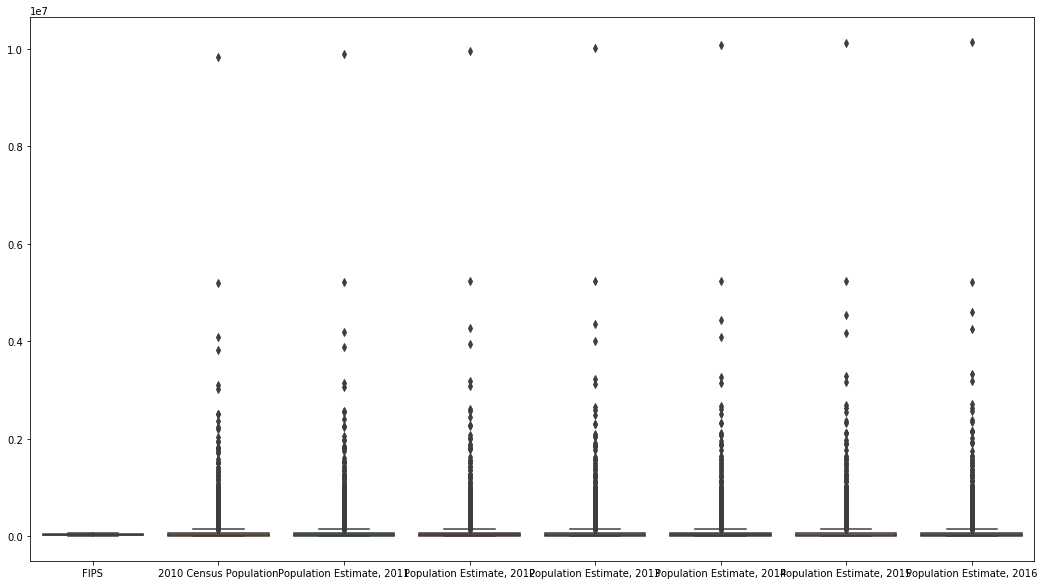

In [30]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot(data=population)

Population take-aways: 
- The median population seems to be a better estimate of the average due to extreme outliers. 

### Restaurants

In [31]:
df_describe[5]

,FIPS,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,67.09,72.82,7.96,0.56,0.58,5.32,70.54,76.11,6.62,0.78,0.78,4.21,641.64,599.68,624.49,651.94
std,15156.37,230.55,254.84,40.20,0.30,0.31,34.51,232.96,258.80,42.58,0.58,0.59,34.88,96.66,78.75,128.10,116.57
min,1001.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,402.10,364.11,371.85,439.73
25%,18178.50,5.00,5.00,-6.90,0.40,0.41,-7.82,7.00,7.00,-10.00,0.49,0.49,-10.86,576.21,530.27,534.38,573.69
50%,29176.00,14.00,15.00,2.56,0.57,0.58,2.03,17.00,17.00,1.18,0.67,0.68,1.28,632.34,611.29,617.34,643.14
75%,45079.50,41.25,44.00,18.01,0.70,0.73,15.83,47.00,49.00,15.38,0.90,0.90,13.18,721.82,650.72,711.77,697.65
max,56045.00,7118.00,7798.00,400.00,6.09,5.56,306.91,7025.00,7821.00,1000.00,13.70,13.89,340.14,1043.86,1035.39,1930.16,2160.50


Restaurants Take-away:
- On average the number of fast food restaurants have increased in both regular and population-considered data. 
- However expenditure on fast food has decreased from 2007 to 2012. This could be that fast food prices have decreased, or that people are actually spending less money on fast food. 

### Socioeconomic

In [32]:
df_describe[6]

,FIPS,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,78.34,8.75,8.29,1.14,1.81,0.08,15.89,23.41,48595.72,16.26,0.11,23.23,0.22,0.37,0.17
std,15156.37,19.81,14.43,13.20,2.47,7.24,0.95,4.18,3.35,12380.45,6.45,0.32,9.37,0.42,0.48,0.37
min,1001.00,2.86,0.00,0.00,0.00,0.00,0.00,3.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18178.50,66.99,0.40,1.59,0.27,0.19,0.01,13.12,21.43,40430.50,11.50,0.00,16.20,0.00,0.00,0.00
50%,29176.00,85.77,1.91,3.29,0.46,0.30,0.02,15.57,23.33,46803.50,15.20,0.00,22.30,0.00,0.00,0.00
75%,45079.50,94.18,9.73,8.23,0.99,0.63,0.05,18.20,25.10,54158.50,19.70,0.00,29.10,0.00,1.00,0.00
max,56045.00,99.16,85.44,95.74,43.01,86.32,48.89,43.38,40.13,125900.00,47.40,1.00,61.60,1.00,1.00,1.00


In [33]:
socioecnomic["METRO13"].value_counts()

0    1974
1    1166
Name: METRO13, dtype: int64

In [34]:
socioecnomic["POPLOSS10"].value_counts()[1]/socioecnomic["POPLOSS10"].value_counts()[0]

0.20260436614324015

In [35]:
socioecnomic["PERPOV10"].value_counts()[1]/socioecnomic["PERPOV10"].value_counts()[0]

0.12585155969881678

In [36]:
socioecnomic["PERCHLDPOV10"].value_counts()[1]/socioecnomic["PERCHLDPOV10"].value_counts()[0]

0.2900575184880855

Socioeconomic take-aways:
- Around half of counties are metro areas
- Around 20% of counties have consistant population loss between 1990 and 2000, and again between 2000 and 2010.
- around 12% of counties have pervasive poverty
- around 30% of counties have pervasive childhood poverty 
- There are outlier counties in terms of race; however, over 75% of counties are over 50% white.


### Stores

In [37]:
df_describe[7]

,FIPS,GROC09,GROC14,PCH_GROC_09_14,GROCPTH09,GROCPTH14,PCH_GROCPTH_09_14,SUPERC09,SUPERC14,PCH_SUPERC_09_14,SUPERCPTH09,SUPERCPTH14,PCH_SUPERCPTH_09_14,CONVS09,CONVS14,PCH_CONVS_09_14,CONVSPTH09,CONVSPTH14,PCH_CONVSPTH_09_14,SPECS09,SPECS14,PCH_SPECS_09_14,SPECSPTH09,SPECSPTH14,PCH_SPECSPTH_09_14,SNAPS12,SNAPS16,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
count,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30387.63,20.25,21.01,-0.93,0.27,0.25,-2.54,1.43,1.69,11.12,0.02,0.02,5.47,38.40,39.77,4.09,0.60,0.60,2.54,7.63,7.19,2.27,0.06,0.05,-5.87,71.90,75.79,9.48,0.88,0.93,9.22,14.38,15.12,2.00,0.26,0.23,-3.83
std,15156.37,79.71,90.41,37.32,0.22,0.22,33.67,3.36,4.00,33.38,0.02,0.02,24.80,87.82,94.54,35.85,0.31,0.31,31.72,31.67,29.53,61.08,0.08,0.07,50.18,222.16,221.00,29.71,0.39,0.38,30.40,49.88,55.86,71.92,0.26,0.21,25.61
min,1001.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-100.00,0.00,0.00,-76.47,0.00,0.00,-76.87,0.00,0.00,-100.00,0.00,0.00,-100.00
25%,18178.50,3.00,3.00,-20.00,0.15,0.14,-20.41,0.00,0.00,0.00,0.00,0.00,0.00,7.00,7.00,-11.65,0.41,0.40,-12.34,0.00,0.00,-20.00,0.00,0.00,-21.77,10.00,10.42,-1.66,0.63,0.69,-2.25,3.00,3.00,-12.50,0.12,0.12,-15.23
50%,29176.00,6.00,5.00,0.00,0.21,0.19,-1.61,1.00,1.00,0.00,0.01,0.01,0.00,15.00,16.00,0.00,0.55,0.54,-0.44,1.00,1.00,0.00,0.04,0.04,0.00,22.50,24.08,6.14,0.82,0.88,5.70,5.00,5.00,0.00,0.19,0.18,-2.29
75%,45079.50,13.00,12.00,7.23,0.31,0.28,5.39,1.00,1.00,0.00,0.03,0.03,1.40,36.00,36.00,12.32,0.73,0.72,10.58,4.00,4.00,0.00,0.08,0.08,2.00,54.29,58.77,17.04,1.07,1.11,16.41,11.00,11.00,0.00,0.30,0.27,3.38
max,56045.00,2027.00,2429.00,600.00,3.07,3.15,320.15,83.00,95.00,300.00,0.26,0.25,299.97,1949.00,2111.00,600.00,3.12,4.60,366.69,928.00,782.00,400.00,1.37,1.39,403.42,6466.67,6415.67,1100.00,6.66,6.05,1135.31,1285.00,1602.00,2100.00,4.62,2.99,294.07


In [38]:
stores.loc[stores["PCH_GROCPTH_09_14"]>300].merge(population, on="FIPS")

,FIPS,State_x,County_x,GROC09,GROC14,PCH_GROC_09_14,GROCPTH09,GROCPTH14,PCH_GROCPTH_09_14,SUPERC09,SUPERC14,PCH_SUPERC_09_14,SUPERCPTH09,SUPERCPTH14,PCH_SUPERCPTH_09_14,CONVS09,CONVS14,PCH_CONVS_09_14,CONVSPTH09,CONVSPTH14,PCH_CONVSPTH_09_14,SPECS09,SPECS14,PCH_SPECS_09_14,SPECSPTH09,SPECSPTH14,PCH_SPECSPTH_09_14,SNAPS12,SNAPS16,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12,State_y,County_y,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016",Abrv
0,12013,FL,Calhoun,1,4,300.0,0.068064,0.275255,304.404074,0,0,0.0,0.0,0.0,0.0,3,4,33.333333,0.204193,0.275255,34.801358,0,0,0.0,0.0,0.000000,0.000000,11.25,10.000000,-11.111111,0.764111,0.693337,-9.262212,3,3,0.0,0.221517,0.203763,-8.014668,Florida,Calhoun,14625,14769,14717,14634,14510,14468,14423,FL
1,22091,LA,St. Helena,1,4,300.0,0.089654,0.376683,320.152557,0,0,0.0,0.0,0.0,0.0,7,9,28.571429,0.627578,0.847537,35.049036,0,0,0.0,0.0,0.000000,0.000000,13.00,13.000000,0.000000,1.174239,1.236682,5.317732,4,4,0.0,0.378752,0.361304,-4.606631,Louisiana,St. Helena,11203,11013,11036,10843,10612,10569,10512,LA
2,28143,MS,Tunica,1,4,300.0,0.092064,0.377430,309.964144,0,0,0.0,0.0,0.0,0.0,19,24,26.315789,1.749217,2.264578,29.462361,0,1,100.0,0.0,0.094357,9.435743,19.00,21.166667,11.403509,1.813842,2.068269,14.026945,0,0,0.0,0.000000,0.000000,0.000000,Mississippi,Tunica,10778,10590,10449,10475,10536,10342,10234,MS
3,48081,TX,Coke,1,4,300.0,0.302115,1.229256,306.883835,0,0,0.0,0.0,0.0,0.0,5,1,-80.000000,1.510574,0.307314,-79.655808,0,0,0.0,0.0,0.000000,0.000000,4.75,5.166667,8.771930,1.470133,1.582925,7.672214,1,0,-100.0,0.297974,0.000000,-100.000000,Texas,Coke,3320,3280,3218,3196,3232,3230,3264,TX


In [39]:
stores.loc[stores["PCH_CONVSPTH_09_14"]>300].merge(population, on="FIPS")

,FIPS,State_x,County_x,GROC09,GROC14,PCH_GROC_09_14,GROCPTH09,GROCPTH14,PCH_GROCPTH_09_14,SUPERC09,SUPERC14,PCH_SUPERC_09_14,SUPERCPTH09,SUPERCPTH14,PCH_SUPERCPTH_09_14,CONVS09,CONVS14,PCH_CONVS_09_14,CONVSPTH09,CONVSPTH14,PCH_CONVSPTH_09_14,SPECS09,SPECS14,PCH_SPECS_09_14,SPECSPTH09,SPECSPTH14,PCH_SPECSPTH_09_14,SNAPS12,SNAPS16,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12,State_y,County_y,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016",Abrv
0,5101,AR,Newton,3,4,33.333333,0.360967,0.506073,40.199055,0,0,0.0,0.0,0.0,0.0,1,4,300.0,0.120322,0.506073,320.597166,1,1,0.0,0.120322,0.126518,5.149291,8.416667,7.833333,-6.930693,1.040894,0.987063,-5.171571,1,1,0.0,0.120569,0.123671,2.572339,Arkansas,Newton,8330,8278,8087,8078,7914,7923,7936,AR
1,29085,MO,Hickory,1,2,100.000000,0.104592,0.216943,107.419460,0,0,0.0,0.0,0.0,0.0,2,9,350.0,0.209183,0.976245,366.693785,0,0,0.0,0.000000,0.000000,0.000000,8.500000,9.833333,15.686275,0.905122,1.060884,17.208955,1,1,0.0,0.111210,0.106485,-4.248748,Missouri,Hickory,9627,9580,9388,9269,9218,9193,9269,MO
2,46043,SD,Douglas,2,2,0.000000,0.662910,0.672721,1.479987,0,0,0.0,0.0,0.0,0.0,1,4,300.0,0.331455,1.345442,305.919946,1,1,0.0,0.331455,0.336361,1.479987,3.083333,3.000000,-2.702703,1.038159,1.023192,-1.441687,3,3,0.0,1.010782,1.010101,-0.067342,South Dakota,Douglas,3002,2985,2961,2994,2944,2976,2932,SD


Stores take-aways:
- number of grocery stores are slowly decreasing, even per 1,000ppl; however there are some outlier counties where the number of grocercy stores is increasing. I see no reasoning in the data why the largest outliers have such a large increase. The population is relatively stable. It could be an increase in small, locally-owned stores, but I would need to research more to see. 
- Overall the number of supercenters seems to be increasing slightly or staying stable. 
- The number of convenience stores is relatively stable, with again, some outlier counties. This could be because convenience stores can also be connected to gas stations, so if there are new gas stations in an area, it would increase the number of convenience stores. 
- There is an increase in the number of SNAP accepting stores per county which could indicate an increase in demand. However there is a decrease in the number of stores that accept WIC. 

## Investigating Interest Points

### Change in grocery stores vs. change in fast food restaurants

In [40]:
stores.head()

,FIPS,State,County,GROC09,GROC14,PCH_GROC_09_14,GROCPTH09,GROCPTH14,PCH_GROCPTH_09_14,SUPERC09,SUPERC14,PCH_SUPERC_09_14,SUPERCPTH09,SUPERCPTH14,PCH_SUPERCPTH_09_14,CONVS09,CONVS14,PCH_CONVS_09_14,CONVSPTH09,CONVSPTH14,PCH_CONVSPTH_09_14,SPECS09,SPECS14,PCH_SPECS_09_14,SPECSPTH09,SPECSPTH14,PCH_SPECSPTH_09_14,SNAPS12,SNAPS16,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
0,1001,AL,Autauga,6,4,-33.333333,0.110834,0.072209,-34.849716,1,1,0.0,0.018472,0.018052,-2.274574,29,30,3.448276,0.535698,0.541565,1.095269,2,2,0.000000,0.036945,0.036104,-2.274574,37.416667,42.166667,12.694878,0.674004,0.760911,12.894172,6,5,-16.66667,0.119156,0.090067,-24.412460
1,1003,AL,Baldwin,24,29,20.833333,0.133775,0.144920,8.331001,6,6,0.0,0.033444,0.029983,-10.346758,119,118,-0.840336,0.663300,0.589673,-11.100146,21,26,23.809524,0.117053,0.129928,10.999253,138.333333,198.083333,43.192771,0.725055,0.949753,30.990390,25,27,8.00000,0.141875,0.141517,-0.252126
2,1005,AL,Barbour,5,5,0.000000,0.180786,0.185963,2.863838,0,1,100.0,0.000000,0.037193,3.719270,14,19,35.714286,0.506201,0.706661,39.600922,2,2,0.000000,0.072314,0.074385,2.863838,34.833333,35.166667,0.956938,1.280590,1.354387,5.762745,6,7,16.66667,0.201099,0.257344,27.968330
3,1007,AL,Bibb,6,5,-16.666667,0.261540,0.222163,-15.055985,1,1,0.0,0.043590,0.044433,1.932818,19,15,-21.052632,0.828211,0.666489,-19.526723,0,1,100.000000,0.000000,0.044433,4.443260,16.250000,19.583333,20.512821,0.719122,0.864874,20.267995,6,5,-16.66667,0.277919,0.221268,-20.383970
4,1009,AL,Blount,6,6,0.000000,0.104637,0.103952,-0.654897,1,1,0.0,0.017440,0.017325,-0.654897,31,27,-12.903226,0.540625,0.467784,-13.473620,2,0,-100.000000,0.034879,0.000000,-100.000000,38.000000,47.083333,23.903509,0.657144,0.815946,24.165470,10,6,-40.00000,0.173028,0.103760,-40.033200


In [41]:
groc_vs_ff = stores.merge(restaurants, on="FIPS")[["FIPS", 
                                                   "State_x", 
                                                   "County_x", 
                                                   "PCH_GROCPTH_09_14", 
                                                   "GROCPTH14", 
                                                   "PCH_FFRPTH_09_14", 
                                                   "FFRPTH14"]]

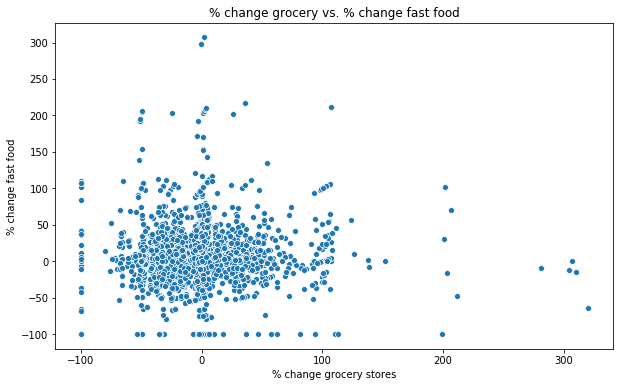

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff,
                    x="PCH_GROCPTH_09_14",
                    y="PCH_FFRPTH_09_14");
ax.set(xlabel='% change grocery stores', ylabel='% change fast food');
ax.set_title('% change grocery vs. % change fast food');


There is no real trend visible here; however, it does show a strong cluster with few outliers. 

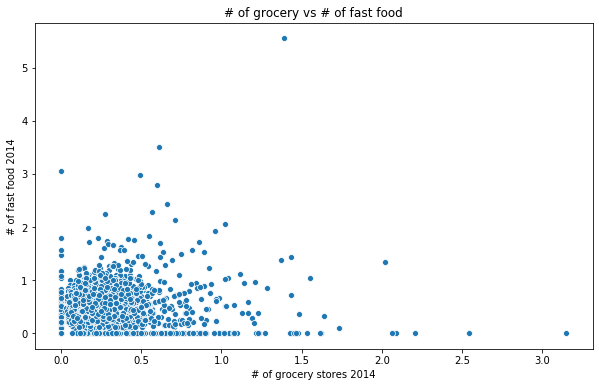

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff,
                    x="GROCPTH14",
                    y="FFRPTH14");
ax.set(xlabel='# of grocery stores 2014', ylabel='# of fast food 2014');
ax.set_title('# of grocery vs # of fast food');


Looking at the graphs above, there does seem to be a weak connection. I will standardize the data to see if there are any hidden trends. 

In [44]:
def standardizer(df):
    print("standardizing...")
    return ((df - df.mean()) / df.std()).astype(float)

In [45]:
X_train = groc_vs_ff[["PCH_GROCPTH_09_14", 
                      "GROCPTH14",                      
                      "PCH_FFRPTH_09_14",                  
                      "FFRPTH14"]]
groc_vs_ff_std = groc_vs_ff[["FIPS", "State_x", "County_x"]].merge(standardizer(X_train), 
                                                                   left_index=True, 
                                                                   right_index=True)

standardizing...


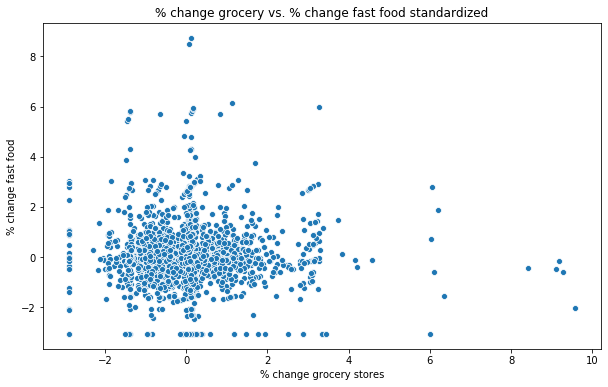

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff_std,
                    x="PCH_GROCPTH_09_14",
                    y="PCH_FFRPTH_09_14");
ax.set(xlabel='% change grocery stores', ylabel='% change fast food');
ax.set_title('% change grocery vs. % change fast food standardized');


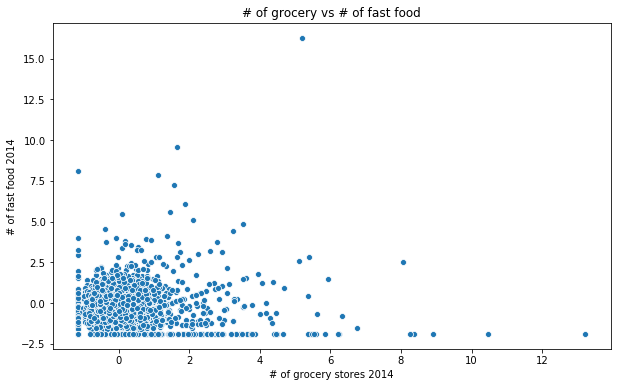

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff_std,
                    x="GROCPTH14",
                    y="FFRPTH14");
ax.set(xlabel='# of grocery stores 2014', ylabel='# of fast food 2014');
ax.set_title('# of grocery vs # of fast food');

Because standardizing maintains the relationship between the counties, it did not affect the visualization of the trend. 

In [48]:
groc_vs_ff_socio = groc_vs_ff.merge(socioecnomic, on="FIPS")[["FIPS", 
                                                              "State_x", 
                                                              "County_x", 
                                                              "PCH_GROCPTH_09_14", 
                                                              "GROCPTH14", 
                                                              "PCH_FFRPTH_09_14", 
                                                              "FFRPTH14", 
                                                              "METRO13", 
                                                              "PERPOV10", 
                                                              "POPLOSS10" ]]

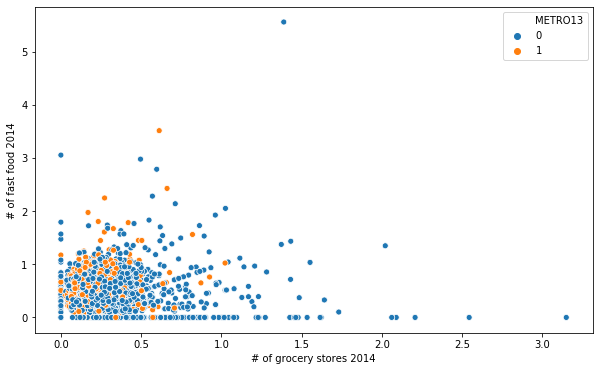

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff_socio,
                    x="GROCPTH14",
                    y="FFRPTH14", 
                    hue="METRO13");
ax.set(xlabel='# of grocery stores 2014', ylabel='# of fast food 2014');

I thought that maybe metro areas would affect the number of fast food or grocery stores; however, there does not seem to be a strong connection. Again, there appears to be more of a cluster forming instead of a linear relationship. 


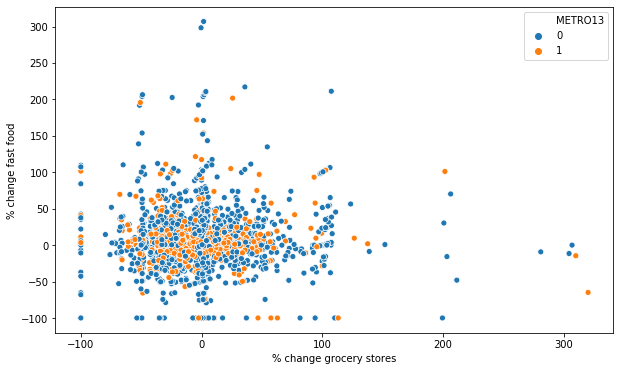

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff_socio,
                    x="PCH_GROCPTH_09_14",
                    y="PCH_FFRPTH_09_14",
                    hue="METRO13");
ax.set(xlabel='% change grocery stores', ylabel='% change fast food');

As mentioned above, there seems to be more of a cluster forming instead of a linear relationship between grocery stores and fast food, separated by metro area. 

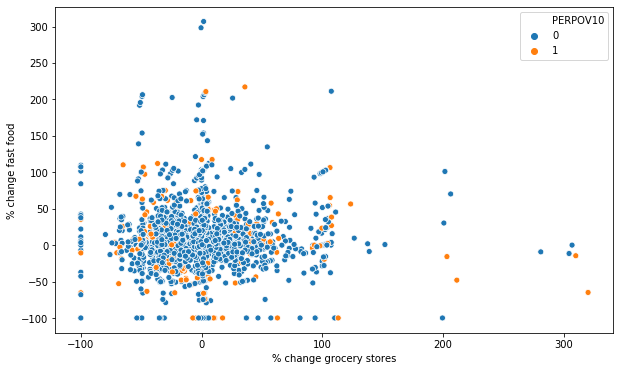

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=groc_vs_ff_socio,
                    x="PCH_GROCPTH_09_14",
                    y="PCH_FFRPTH_09_14",
                    hue="PERPOV10");
ax.set(xlabel='% change grocery stores', ylabel='% change fast food');

Another feature I wanted to look at was if counties with pervasive poverty had an increase in fast food stores with a decrease in grocery stores. Again, it doesn't seem to be the case. 

### Low food acccess and fast food

In [52]:
access.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,LACCESS_HHNV10,LACCESS_HHNV15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,LACCESS_SNAP15,PCT_LACCESS_SNAP15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,LACCESS_SENIORS10,LACCESS_SENIORS15,PCH_LACCESS_SENIORS_10_15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,LACCESS_WHITE15,PCT_LACCESS_WHITE15,LACCESS_BLACK15,PCT_LACCESS_BLACK15,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,22.439248,9.793530,11.991125,664.216487,677.672769,2.025888,3.284786,3.351332,931.935186,4.608749,4822.500269,4616.971480,-4.261872,8.837112,8.460485,2388.233228,2180.809285,-8.685247,4.376378,3.996279,12640.615414,23.163613,4216.473194,7.726582,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,-0.656270,5.460261,5.424427,1571.779915,1394.162766,-11.300383,2.147827,1.905114,950.535290,1.298900,7916.131932,7007.972675,-11.472260,4.343199,3.844936,6404.008603,5580.662790,-12.856726,3.513570,3.061840,25483.186811,13.981393,3540.965826,1.942757,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,-5.959985,11.420316,10.739667,406.142372,425.144927,4.678792,4.135869,4.329378,422.569040,4.303147,940.419327,1031.927776,9.730601,3.425062,3.758341,770.214550,824.175262,7.005933,2.805166,3.001695,2828.876711,10.302934,2713.124930,9.881360,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,21.307144,2.144661,2.601627,275.060875,224.388125,-18.422377,3.458580,2.821427,53.818772,0.676710,249.204753,232.642670,-6.645974,1.087518,1.015242,150.553323,137.688231,-8.545207,0.657008,0.600865,540.512239,2.358770,419.099942,1.828933,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,171.081177,1.062468,2.880150,705.466783,719.931444,2.050367,3.269380,3.336414,175.370338,0.812727,384.911607,910.686113,136.596168,0.671490,1.588720,195.049051,505.914282,159.377977,0.340269,0.882583,3387.241266,5.909147,95.842687,0.167201,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [53]:
la_vs_ff = access[["FIPS",
                   "PCT_LACCESS_POP10",
                   "PCT_LACCESS_POP15"]].merge(restaurants, on="FIPS")

In [54]:
la_vs_ff.head()

,FIPS,PCT_LACCESS_POP10,PCT_LACCESS_POP15,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,33.769657,32.062255,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,19.318473,16.767489,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,20.840972,22.105560,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,4.559753,4.230324,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,2.700840,6.497380,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


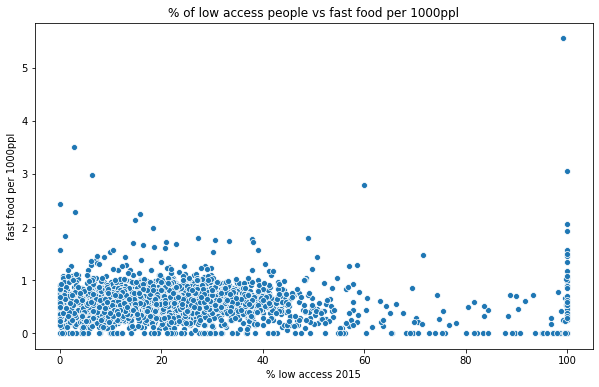

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=la_vs_ff,
                    x="PCT_LACCESS_POP15",
                    y="FFRPTH14");
ax.set(xlabel='% low access 2015', ylabel='fast food per 1000ppl');
ax.set_title("% of low access people vs fast food per 1000ppl");

### Insecurity on State level

Because many of the trends I was hoping to see are not visible, I decided to choose what states to look at based on general food insecurity. Maybe in states where there are higher levels of food insecurity, there would be different trnest

In [56]:
insecurity_state.describe()

,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29028.308470,14.182353,13.549020,-0.633333,5.511765,5.390196,-0.121569,8.190196,8.954902
std,15837.675070,2.430284,2.621631,1.571072,1.011464,1.194028,0.897622,1.724906,1.667491
min,1067.000000,8.700000,8.500000,-4.300000,3.200000,2.900000,-2.600000,4.800000,5.100000
25%,16573.000000,12.800000,11.650000,-1.900000,4.800000,4.500000,-0.550000,6.900000,7.900000
50%,29117.713043,14.100000,13.200000,-0.500000,5.500000,5.300000,-0.200000,8.000000,8.800000
75%,41551.500000,15.500000,15.050000,0.250000,6.200000,6.200000,0.300000,9.200000,10.050000
max,56023.000000,20.900000,20.800000,2.700000,8.100000,7.900000,2.900000,12.600000,12.800000


In [57]:
insecurity_state.head()

,State,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
0,AK,2149.357143,12.1,13.3,1.2,4.4,4.4,0.0,7.4,8.0
1,AL,1067.000000,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
2,AR,5075.000000,14.9,14.9,0.0,6.4,6.0,-0.4,11.2,11.5
3,AZ,4013.866667,19.7,19.2,-0.5,8.1,7.4,-0.7,9.7,10.9
4,CA,6058.000000,15.6,12.6,-3.0,5.7,4.5,-1.2,10.4,10.8


In [58]:
insecurity_state.loc[insecurity_state["FOODINSEC_13_15"]>15].sort_values(by="FOODINSEC_13_15", ascending=False)

,State,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
24,MO,29117.713043,20.9,20.8,-0.1,6.9,7.9,1.0,8.3,9.0
3,AZ,4013.866667,19.7,19.2,-0.5,8.1,7.4,-0.7,9.7,10.9
18,LA,22064.000000,15.7,18.4,2.7,4.8,7.7,2.9,9.1,9.0
1,AL,1067.000000,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
17,KY,21120.000000,15.6,17.6,2.0,6.2,7.3,1.1,8.0,10.0
37,OR,41036.000000,13.6,16.1,2.5,5.8,6.6,0.8,9.5,10.4
35,OH,39088.000000,16.1,16.1,0.0,7.1,6.6,-0.5,8.2,8.6
29,NE,31093.000000,17.0,15.9,-1.1,5.5,6.2,0.7,7.3,8.1
19,MA,25014.000000,14.9,15.8,0.9,7.1,7.4,0.3,6.4,7.1
36,OK,40077.000000,15.3,15.5,0.2,6.6,6.4,-0.2,10.5,11.4


I am going to look further into Missouri, Arizona, Louisiana, Alabama, and Kentuckey. These states have the highest levels of food insecurity between 2013-2015, as well as extremely high levels of very low food security. 